## 4-2. 확률적 경사 하강법
#### 학습 목표 
- 경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배워보자 

## 1. 점진적인 학습 
- 교재 예제에서 당면한 문제는 훈련 데이터가 한 번에 준비되는 것이 아닌 조금씩 전달된다라는 것이다. 생선이 도착하는 대로 판매를 해야하기 때문에 데이터가 쌓일 때까지 무작정 기다릴 수 없다.
- 현재 두가지 방안을 제안한다.
    1. 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련 시키는 방법
    2. 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지하는 방법
- 하지만 위 두가지 방법은 각각의 단점이 존재한다. 1번 방식의 단점은 시간이 지날수록 데이터가 늘어나며 그에 따른 서버증강, 모델 예측 등 추가 비용이 발생하게 된다. 2번 방식의 단점은 이전 데이터를 버림으로써 유지 보수의 비용은 적게 들수 있으나, 데이터셋의 크기가 커지지 않을 수 있고,만약 데이터를 버릴 때 다른 데이터에 없는 중요한 정보가 포함된다면 추후 모델이 정확히 예측하지 못하는 불상사가 일어난다.
- 좋은 방법은 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 수 있는 방식이다. 이런 식의 훈련 방식을 **점진적 학습 또는 온라인 학습** 이라고 부른다. 
- 점진적 학습의 대표적 알고리즘은 **확률적 경사 하강법(Stochastic Gradient Descent)** 이다. 

### 1-1. 확률적 경사 하강법 
- 확률적 경사 하강법에서 '확률적'이란 '무작위하게' 또는 '랜덤하게'의 기술적 표현, '경사'는 '기울기', '하강법'은 '내려가는 방법' 으로 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 방법을 말한다.

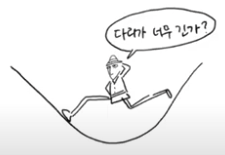

- 첫 번째 **'경사 하상법'**에 대해 이야기 해보자. 극적인 예를들면 산에서 하산시 빨리 귀가하고 싶어 산을 빨리 내려가고 싶다면 가장 빠른 길인 경사가 가파른 곳으로 내려가지 않을까?(등산시 꼭 등산로로 안전하게 가야한다.) 경사 하강법도 비슷하다. 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표이다. 그런데 위 그림처럼 긴 다리를 가지고 있어 걸음이 너무 크면 경사를 따라 내려가지 못하고 오히려 올라가는 경우가 발생할 수 있다. 
- 조금 과장되었지만, 실제로 산에 내려올 때는 나뭇잎 속에 가려진 웅덩이가 있을지도 모르니 천천히 내려가야한다. 경사 하강법도 마찬가지이다. **<font color=blue>가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것,</font>** 이런 과정이 바로 경사 하강법 모델을 훈련하는 방식이다.
- 두 번째 **'확률적'**에 대해 이야기 해보자. 경사 하강법으로 내려올 때 가장 가파른 길을 찾는 방법은 어떤 것일까? 훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾을 것이다. 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. 즉 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것 이것이 바로 **<font color=red>확률적 경사 하강법</font>** 이다. 조금 더 자세히 설명하면, 확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려가고, 그런 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런식으로 전체 샘플을 모두 사용할 때 까지 계속 반복한다.
- 만약 샘플을 모두 사용했다면, 처음부터 다시 훈련 세트에 모든 샘플을 채워넣는 다음, 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려간다. 이렇게 만족할 만한 위치에 도달할 때까지 계속 내려가면 된다. 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 **<font color=blue>에포크(epoch)</font>** 라고 부른다. (일반적으로 수십, 수백번 이상 에포크르 수행한다.)
- 무작위로 샘플을 선택해서 해결한다니 조금은 무책임하게 생각 할 수 있지만, 그래서 아주 조금씩 산을 내려간다. 그렇지 않으면 돌이킬 수 없는 길로 들어서게 될지도 모른다. 하지만 확률적 경사 하강법은 꽤 잘 작동한다. 만약 그래도 걱정이 된다면, 1개씩 말고 무작위로 몇 개의 샘플을 선택해서 경사를 따라 내려가면 된다. 이렇게 여러개의 샘플을 사용해 경사 하강법을 수행하는 방식을 **<font color=red>미니배치 경사 하강법(Minibatch Gradient Descent)</font>** 라고 한다. (실제로 많이 사용한다.)
- 마지막으로 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있다. 이를 **<font color=red>배치 경사 하강법 (Batch Gradient Descent)</font>** 라고 한다. 사실 전체 데이터를 사용하기 때문에 가장 안정적인 방법이라고 말 할 수 있지만, 한 번에 전체 데이터를 읽을 수 있을지 모르며, 컴퓨터 자원을 많이 사용하는 단점이 있다.
- 정리하자면, 확률적 경사 하강법은 <font color=blue>훈련 세트를 사용하여 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘</font> 이다. 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 계속 이어나갈 수있다.

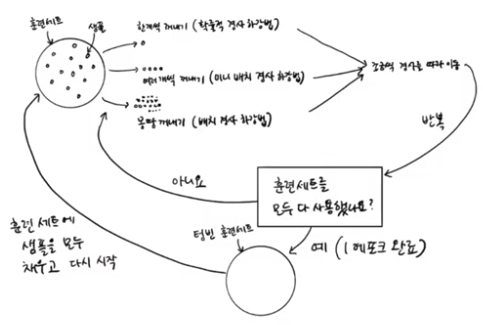

- 위 그림은 위에서 설명한 확률적 경사 하상법 전체의 과정을 나타낸다. 참고로 확률적 경사 하강법을 꼭 사용하는 알고리즘은 바로 <font color=blue>'신경망 알고리즘'</font>이다. 신경망은 일반적으로 많은 데이터를 사용하기 때문에 한 번에 모든 데이터를 사용하기 어렵다. 또한 모델이 매우 복잡하기 때문에 수학적인 방법으로 해답을 얻기 어렵다. 신경망 모델이 <font color=blue>'확률적 경사 하강법</font>이나 <font color=blue>'미니배치 경사 하강법</font>을 사용한다는 점만 기억하자.
- 그런데 한가지 의문, 가장 빠른 길을 찾아 내려가려고 하는 이 산은 도대체 무엇일까? 그것은 바로 **'손실함수'**라 불리는 산이다.

### 1-2. 손실 함수 
- **손실함수(Loss Function)**는 <font color=blue>어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준을 말한다.</font> 손실 함수의 값이 작을수록 좋다고 생각하겠지만 어떤 값이 최솟값인지 알지 못하기 때문에 가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야 한다. 
- 다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있다.그럼 생산을 분류하기 위해서는 어떤 손실 함수를 사용하는지 알아보자.

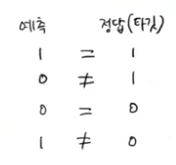

- 분류에서 손실은 아주 확실하다.(바로 정답을 못 맞히는 것!) 이해를 돕기위해 도미와 빙어를 구분하는 이진 분류 문제를 예로 들어고자 한다.
- 도미는 양성 클래스(1), 빙어는 음성 클래스(0)라고 가정해 위의 그림과 같은 예측과 정답이 있다고 생각해보자. 정확도는 4개의 예측 중에 2개만 맞았으므로 1/2 = 0.5(50%) 이다.
- 그렇다면 정확도를 손실 함수로 사용할 수 있을까? (예를 들어 정확도에 음수를 취하면 -1.0이 가장 낮고, -0.0이 가장 높다.)
- 아쉽게도 정확도에는 치명적인 단점이 있다. 예를 들어 위의 그림과 같이 4개의 샘플만 있다면 가능한 정확도는 0, 0.25, 0.5, 0.75, 1 이렇게 다섯 가지뿐이다. 

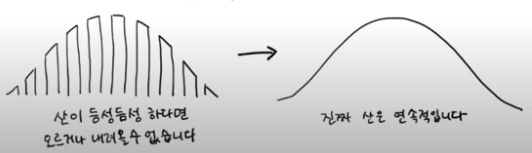

- 앞에서 경사 하상법을 사용할 때 아주 조금씩 내려간다고 했었는데, 정확도가 위의 두 번째 왼쪽 그림과 같이 듬성듬성하다면 경사 하강법을 이용해 조금씩 움직일 수 없다. 산의 경사면은 두 번째 오른쪽 그림과 같이 확실히 연속적이어야 한다!
- 그럼 어떻게 연속적인 손실 함수를 만들 수 있을까? 1절 '로지스틱 회귀'에서 로지스틱 회귀 모델이 확률을 출력했었다. 예측은 0 또는 1이지만 확률은 0에서 1사이의 어떤 값도 될 수 있다. 즉 연속적이다.
- 그렇다면 위의 샘플 4개의 예측 확률을 각각 0.9, 0.3, 0.2 0.8 이라고 가정해보고 첫 번째 샘플부터 하나씩 어떻게 손실함수를 만들 수 있는지 살펴보자.

### 1-3. 로지스틱 손실 함수 
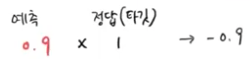

- 첫 번째 샘플의 예측은 0.9이므로 양성 클래스의 타깃인 1과 곱한 다음 음수로 바꿀 수 있다.
- 이 경우 <font color=blue>예측이 1에 가까울수록 좋은 모델</font>이다. <font color=blue>예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아진다</font>. 이 값을 손실 함수로 사용해도 될 듯 하다. 

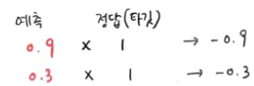

- 두 번째 샘플의 예측은 0.3은 타깃이 양성 클래스(1)인데 거리가 멀다. 위와 마찬가지로 예측과 타깃을 곱해 음수로 바꿔보니 <font color=blue>-0.3으로 첫 번째 샘플보다 높은 손실이 된다.</font> 

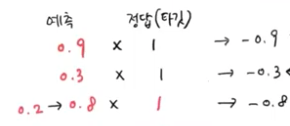

- 세 번째 샘플의 타깃은 음성 클래스라 0이다. 이 값을 예측 확률인 0.2와 그대로 곱한다면 무조건 0이 된다. 그래서 이 타깃을 마치 양성 클래스처럼 바꾸어 1로 만드는 방법이 있다. (대신 예측값도 양성 클래스에 대한 예측으로 바꾸어야 한다. [1 - 0.2 = 0.8])
- 계산해본 결과 손실이 -0.8로 꽤 낮다. 

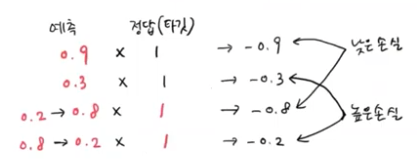

- 네 번째 샘플 타깃도 음성 클래스라 세 번째에서 했던 똑같은 방식으로 음수를 양성 클래스처럼 바꿔서 한다. 그 결과 -0.2로 네 개의 샘플 중 가장 높은 손실을 보였다. 

- 예측 확률을 사용해 이런 식으로 계산하면 연속적인 손실 함수를 얻을 수 있다. 여기에서 예측 확률에 로그 함수를 적용하면 더 좋다. 예측 확률의 범위는 0에서 1 사이인데, 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 된다.
- 손실이 양수가 되면 이해가 더 쉽다. 또 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다.

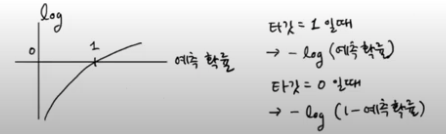

- 정리하면 위의 그림과 같다. <font color=blue>양성 클래스(타깃 = 1)일 때 손실은 -log(예측 확률)로 계산한다. 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 된다.</font> 
- <font color=blue>음성 클래스(타깃 = 0)일 때 손실은 -log(1 - 예측 확률)로 계산한다. 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다.</font> 
- 이 손실 함수를 **<font color=red>'로지스틱 손실 함수(Logistic Loss Function)'</font>**, 또는 **<font color=red>'이진 크로스엔트로피 손실 함수(Binary Cross-entropy Loss Function)'</font>** 라고 부른다.

- 여기에서는 이진 분류를 예로 들었지만 다중 분류도 매우 비슷한 손실 함수를 사용한다. 다중 분류에서 사용하는 손실 함수는 **<font color=red>'크로스엔트로피 손실 함수(Cross-entropy Loss Function)'</font>** 라고 부른다.
- 손실 함수는 우리가 직접 만드는 일은 거의 없다. 이미 문제에 잘 맞는 손실 함수가 개발되어 있기 때문이다. 
    - 이진 분류 -> **<font color=red>'로지스틱 손실 함수(Logistic Loss Function)'</font>**
    - 다중 분류 -> **<font color=red>'크로스엔트로피 손실 함수(Cross-entropy Loss Function)'</font>**

## 2. SGD CLASSIFIER 

In [1]:
# 데이터 불러오기 - 생선 데이터 
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
# 데이터 확인 
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [3]:
# Species 열을 제외한 나머지 5개를 입력 데이터로 설정 / Species는 타깃 데이터로 설정 
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species'].to_numpy()

In [4]:
fish_input

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [5]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [6]:
# 훈련세트와 테스트 세트 나누기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
   fish_input, fish_target, random_state=42)

In [7]:
# 훈련 세트와 테스트 세트의 특성을 표전화 전처리 -> 주의: 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야 한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- 여기까지 동일하게 특성값의 스케일을 맞춘 train_scaled와 test_scaled 두 넘파이 배열을 준비 했다. 
- 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier 이다. 

In [8]:
# 사이킷런에서 확률적 경사 하강법 패키지 임포트 (SGDClassifier)
from sklearn.linear_model import SGDClassifier

- SGDClassifier의 객체를 만들 때 **2개의 매개변수를 지정**한다.
    - loss는 **손실 함수의 종류를 지정** 한다. (여기에서는 **'loss=log'**로 지정하여 로지스틱 손실 함수를 지정함.)
    - max_iter는 수행할 **에포크 횟수를 지정** 한다.(이번 예제에서는 훈련 세트를 10회 반복)
- 그런 다음 훈련 세트와 테스트 세트에서 정확도 점수를 출력 한다.

In [9]:
# 위의 과정 대로 실행 

# 1. 두 개의 매개변수 지정 (손실 함수 종류 지정과 에포크 횟수 지정)
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

# 2. 모델 훈련 
sc.fit(train_scaled, train_target)

# 3. 훈련 세트와 테스트 세트 정확도 출력 
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


- 출력된 훈련 세트와 테스트 세트 결과 각각 0.77로 정확도가 낮다. 아마 지정한 반복 횟수 10번이 부족한 것으로 보인다.
- 앞에서 이야기한 것 처럼 확률적 경사 하강법은 점진적 학습이 가능하다. SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련하고자 한다.
- 모델을 이어서 훈련할 때는 **partial_fit()** 메서드를 사용한다. 이 메서드는 fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다. 

In [10]:
# partial_fit 메서드를 이용하여 추가로 훈련하기 
sc.partial_fit(train_scaled, train_target)

# 훈련 세트와 테스트 세트 정확도 출력 
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.8


- 다시 훈련한 결과 각각 0.8 대로 아직 점수가 낮지만 에포크를 한 번 더 실행하니 정확도가 향상되었다. 이 모델을 여러 에포크에서 더 훈련해 볼 필요가 있어 보인다.
- 하지만 무작정 많이 훈련을 반복할 수는 없기 때문에 어떠한 기준이 필요하다.

## 3. 에포크와 과대/과소적합
- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수있다. 
- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다. 마치 산을 다 내려오지 못 하고 훈련을 마치는 것과 같다. 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습 할 것이다. 
- 바꾸어 말하면, **적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는** <font color=blue>과소적합된 모델</font>일 가능성이 높다. 반대로 **많은 에포크 횟수 동안 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜** <font color=blue>과대적합된 모델</font>일 가능성이 높다.

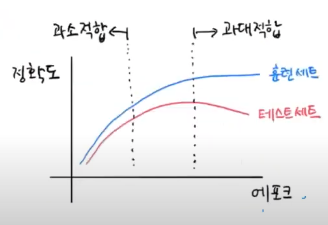

- 위 그래프는 에포크가 진행됨에 따라 모델의 정확도를 나타낸 것이다. 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만, 테스트 세트 점수는 어느 순간 감소하기 시작한다. 바로 이 지점이 모델이 과대적합되기 시작하는 곳이다. 과대적합이 시작되기 전에 훈련을 멈추는 것을 **조기 종료(early stopping)** 라고 한다. 

- 이번 예제에서는 fit() 메서드를 사용하지 않고 partial_fit() 메서드만 사용하고자 한다. partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해주어야 한다. 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만든다. 그리고 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비한다.

In [11]:
# 위의 과정 대로 실행 

sc = SGDClassifier(loss='log', random_state=42)

# 훈련 점수 리스트와 테스트 점수 리스트 만들기 
train_score = []
test_score = []

# 전체 클래스 레이블을 partial_fit() 메서드에 전달하기 위해 train_target에 있는 7개 생선 목록 만들기
classes = np.unique(train_target)

# 300번의 에포크 동안 훈련을 반복하여 진행 -> 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 리스트에 추가 
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

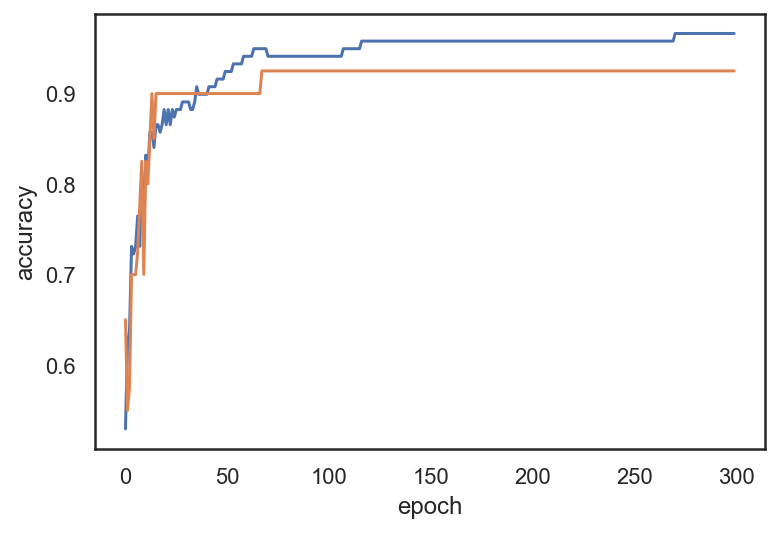

In [12]:
# 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그리기 
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 데이터가 작기 때문에 아주 잘 드러나지 않지만, 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다. (파란색이 훈련 세트, 주황색이 테스트 세트)
- 그리고 확실히 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮다. 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보인다.
- 그렇다면 SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련 해보고 최종적으로 훈련 세트와 테스트 세트에서 점수를 출력해보자. 

In [13]:
# 에포크를 100으로 설정해서 다시 훈련 
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- 참고로 SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. 
- tol 매개변수에서 향상될 최솟값을 지정한다. 앞의 코드에서는 tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 하였다.
- 그 결과 훈련 점수 테스트 점수 각각 0.95, 0.92로 비교적 정확도가 높게 나왔다.

- 해당 섹션을 마무리하기 전 SGDClassifier의 loss 매개변수를 잠시 알아보자.
    - loss의 매개변수의 기본값으 'hinge' 이다. 즉 **힌지 손실(hinge loss)**은 **서포트 벡터 머신(support vector machine)** 이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다.
    - 여기서 알고가야할 점은 서포트 벡터 머신이 널리 사용하는 머신러닝 알고리즘 중 하나라는 점과 SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다 이다.

In [15]:
# 서포트 백터 머신의 간단한 예제 - loss를 힌지 손실로 지정 
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


## 문제 해결 과정 및 결론 
- 문제 해결 과정 및 정리 
    - 이번 공부는 럭키백의 폭박적인 인기에 힘입어 생선을 실시간으로 학습하기 위한 새로운 머신러닝 모델이 필요하여, <font color=orange>확률적 경사 하강법</font>을 사용해 점진적으로 학습하는 <font color=orange>로지스틱 회귀 모델을 훈련</font>하였다.
    - <font color=orange>확률적 경사 하강법</font>은 손실 함수라는 산을 정의하고 가장 가파른 경사를 따라 조금씩 내려오는 알고리즘이다. 
    - 충분히 반복하여 훈련하면 훈련 세트에서 높은 점수를 얻는 모델을 만들 수 있다. 하지만 훈련을 반복할수록 모델이 훈련 세트에 점점 더 잘 맞게 되어 어느 순간 과대적합되고 테스트 세트의 정확도가 줄어든다.
    - 요즘에는 대량의 데이터를 이용하여 문제를 해결해야 하는 일이 흔한데, 이런 넘쳐나는 데이터가 머신러닝와 인공지능의 발전에 크게 기여했다. 데이터가 매우 크기 때문에 전통적인 머신러닝 방식으로 모델을 만들기가 어려워졌다. 데이터를 한 번에 모두 컴퓨터 메모리에 읽을 수 없기 때문이다. 
    - 따라서 데이터를 조금씩 사용해 점진적으로 학습하는 방법이 필요해졌다. <font color=orange>확률적 경사 하강법</font>이 바로 이 문제를 해결하는 핵심 열쇠이다. (뒤에 신경망 알고리즘에서 더 자세 다룰 예정)
    - 그리고 <font color=orange>확률적 경사 하강법</font>은 머신러닝, 딥러닝 알고리즘이 아니라, 머신러닝과 딥러닝 알고리즘을 훈련, 즉 최적화하기 위한 방법이라는 것을 명심하자.